# Tarefa:
> Gerando uma figura que apresenta prismas desenvolvidos por uma determinada modelagem e a curva de anomalia gravitacional produzida por todos os prismas utilizados no modelo. <br>

In [1]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# path referente aa localizacao da pasta modules:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import prism

In [4]:
# Gerando os pontos de observacoes

nobs = 100   # numero de observacoes

# Definindo os limites em x do levantamento sintetico em metros
xmin = 0.1     # limite minimo em x do levantamento sintetico
xmax = 1000.0  # limite maximo em x do levantamento sintetico

# Gerando as coordenadas dos pontos de observacoes
xo = np.linspace(xmin, xmax, nobs) # coordenadas em x
yo = xo*0.0                        # coordenadas em y
zo = np.zeros(nobs)                # coordenadas em z

# Caso 1

>## Anomalia gravimétrica gerada por apenas um único prisma qualquer estabelecido dentro dos limites em x do levantamento sintético

In [5]:
# Definindo o prisma

# model[0] e model[1] sao os limites do prisma no eixo x
# model[2] e model[3] sao os limites do prisma no eixo y
# model[4] e model[5] sao os limites do prisma no eixo z
# model[6] é a densidade do prisma
model = [520, 550, \
         -500, 500, \
         50, 150, \
         2.67]           

In [6]:
# Calculando os componentes gravitacionais

gx1 = prism.prism_gx(xo, yo, zo, model, model[6])
gy1 = prism.prism_gy(xo, yo, zo, model, model[6])
gz1 = prism.prism_gz(xo, yo, zo, model, model[6])

Extensão de um prisma no eixo x: 30 m
Extensão de um prisma no eixo z: 100 m


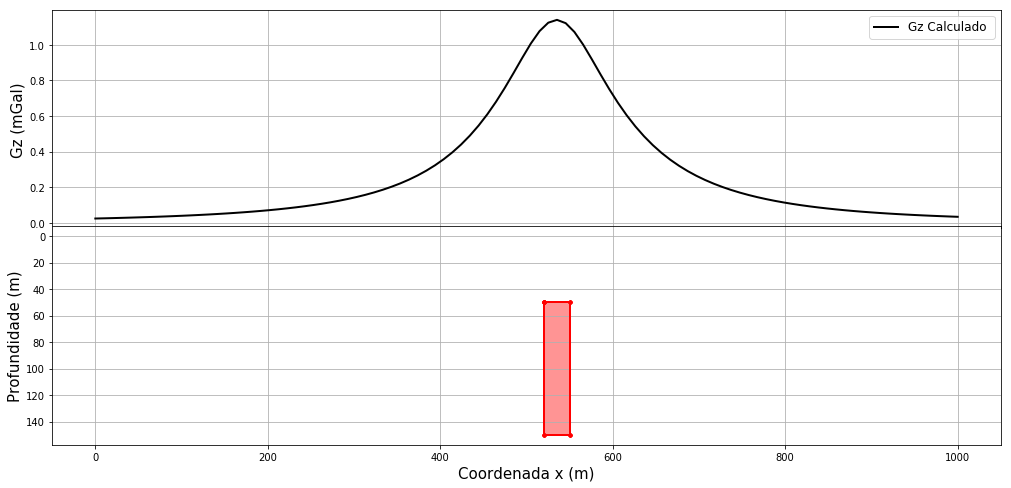

In [7]:
# Printando as extensoes verticais e horizontais dos prismas
ext_x = model[1] - model[0]
ext_z = model[5] - model[4]
print('Extensão de um prisma no eixo x:', format(ext_x,'.0f'), 'm')
print('Extensão de um prisma no eixo z:', format(ext_z,'.0f'), 'm')

# Plotting
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz1, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()

for i in range (5):
    ax2.plot([model[0], model[1], model[1], model[0], model[0]], \
             [model[4], model[4], model[5], model[5], model[4]], \
             ".-r", linewidth=2)

    ax2.fill_between([model[0], model[1], model[1], model[0], model[0]], \
                     [model[4], model[4], model[5], model[5], model[4]], \
                     facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.grid()
plt.show( )

# Caso 2

>## Levantamento gravimétrico gerado por prismas específicados dentro de um conjunto de prismas criados dentro dos limites em x do levantamento sintético

In [8]:
# Gerando um conjunto de prismas justapostos que ocupem toda a extensao em x do levantamento sintetico

# Definindo os limites verticais dos prismas
zmin = -0.1    # limite minimo em z dos prismas
zmax = 3000.0  # limite maximo em z dos prismas

# Gerandos as coordenadas que definem os 4 vertices de cada prima

xmed = ( xo[0] + xo[1] ) / 2.0
x_prisma = abs( xo[0] - ( xmed ) ) # distância do centro dos prismas até um dos seus limites horizontais

x_coord = [] # coordenadas horizontais de cada vértice de cada prisma
z_coord = [] # coordenadas verticais de cada vértice de cada prisma
# x_coord [i] e z_coord [i] correspondem às coordenadas do prisma cujo índice é i
for i in range (nobs):
    x_coord.append([xo[i] - x_prisma, xo[i] + x_prisma, xo[i] + x_prisma, \
                    xo[i] - x_prisma, xo[i] - x_prisma])
    
    z_coord.append([zmin, zmin, zmax, zmax, zmin])

In [9]:
# Selecionando os prismas considerados no levantamento sintético pelos seus indices
index_total = [5, 20, 21, 34, 35, 36, 53, 54, 55, 56, 72, 73, 74, 75, 76, \
                  91, 92, 93, 94, 95, 96]

# Conferindo se a selecao de prismas foi feita corretamente
if max(index_total) >= nobs:
        raise ValueError("Retirar os indices incorretos da lista index_total")
        
# Calculando os componentes gravitacionais
                         
gx2 = 0
gy2 = 0
gz2 = 0
for i in index_total:
    
    decisao = 'nao' # variavel que da liberdade para variar determinados dados
    # model[0] e model[1] sao os limites do prisma no eixo x
    # model[2] e model[3] sao os limites do prisma no eixo y
    # model[4] e model[5] sao os limites do prisma no eixo z
    # model[6] é a densidade do prisma
    if decisao == 'nao':
        model = [x_coord[i][0], x_coord[i][1], \
                 -500, 500, \
                 z_coord[i][0], z_coord[i][2], \
                 2.67]
    else:
        density = []  
        model = [x_coord[i][0], x_coord[i][1], \
                 -500, 500, \
                 z_coord[i][0], z_coord[i][2], \
                 density[i]]              
    
    gx2 += prism.prism_gx(xo, yo, zo, model, model[6])
    gy2 += prism.prism_gy(xo, yo, zo, model, model[6])
    gz2 += prism.prism_gz(xo, yo, zo, model, model[6])

Extensão de um prisma no eixo x: 10 m
Extensão de um prisma no eixo z: 3000 m


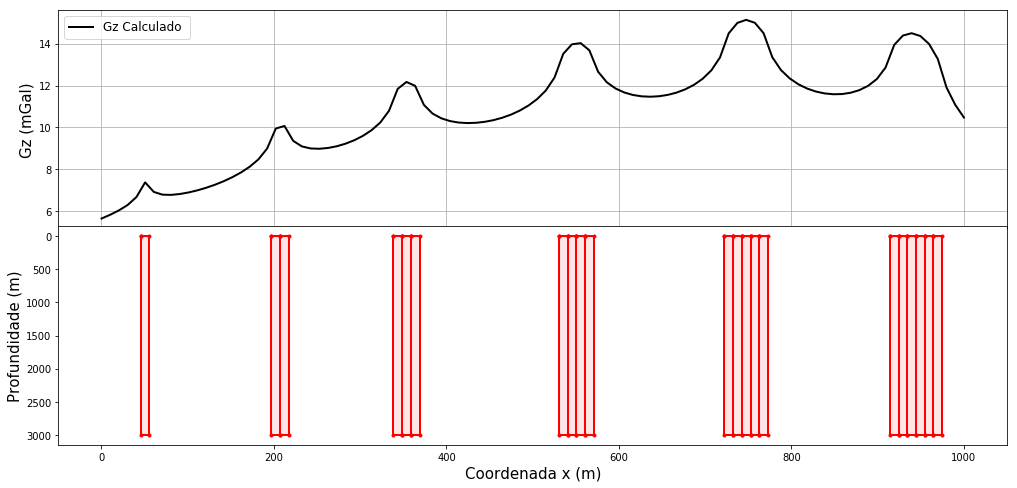

In [10]:
# Printando as extensoes verticais e horizontais dos prismas
ext_x = model[1] - model[0]
ext_z = model[5] - model[4]
print('Extensão de um prisma no eixo x:', format(ext_x,'.0f'), 'm')
print('Extensão de um prisma no eixo z:', format(ext_z,'.0f'), 'm')

# Plotting
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

ax1.plot(xo, gz2, 'k-', label='Gz Calculado ', linewidth=2)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.label_outer()

for i in index_total:
    ax2.plot(x_coord[i], z_coord[i], ".-r", linewidth=2)

    ax2.fill_between(x_coord[i], z_coord[i], facecolor='red', alpha=0.1)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG
plt.show( )

# Desenvolvendo uma função para a modelagem de prismas apresentada acima 

In [11]:
import modeling

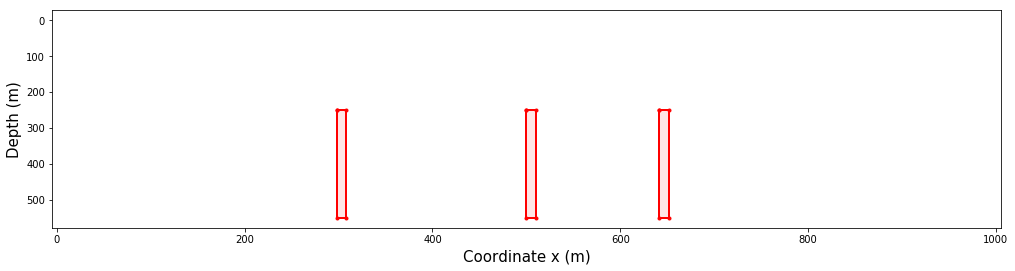

In [12]:
modeling.multi_prism([30, 50, 64], 100, 0.0, 1000.0, 250.0, 550.0)